In [5]:
# Import necessary libraries
import pandas as pd  # Pandas for data manipulation
import seaborn as sns  # Seaborn for statistical data visualization
import matplotlib.pyplot as plt  # Matplotlib for creating visualizations
import matplotlib.dates as mdates  # Matplotlib's dates module for handling dates
from datetime import datetime  # Datetime module for datetime operations
from scipy import stats  # Scipy for statistical computations
import numpy as np  # NumPy for numerical computations
from sklearn.metrics import mean_squared_error, r2_score  # Scikit-learn's metrics for regression
import numpy as np  # NumPy for numerical computations
from sklearn.preprocessing import StandardScaler  # Scikit-learn's StandardScaler
from sklearn.cluster import KMeans  # Scikit-learn's KMeans clustering
from sklearn.preprocessing import StandardScaler  # Scikit-learn's StandardScaler
from pandas.plotting import parallel_coordinates  # Pandas' parallel_coordinates for plotting
from sklearn.decomposition import PCA  # Scikit-learn's PCA
from sklearn.metrics import silhouette_score  # Scikit-learn's silhouette_score
import pandas as pd  # Pandas for data manipulation
import seaborn as sns  # Seaborn for statistical data visualization
from sklearn.model_selection import train_test_split  # Scikit-learn's train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Scikit-learn's StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Scikit-learn's metrics for regression






In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
energy_data = pd.read_csv('/content/drive/MyDrive/PROCESSED-Energy-Dataset-192-FINAL (1).csv')
# Load the weather dataset
weather_data=pd.read_csv('/content/drive/MyDrive/Hourly-Weather-Data-Final.csv') # Read weather dataset into a Pandas DataFrame


In [8]:
energy_data.head(10)  # Displaying the first 10 rows of the energy_data DataFrame

Smart Meter Id       Flats Category  \
0  0000002341DE24A  Residential College   
1  0000002341DE24A  Residential College   
2  0000002341DE24A  Residential College   
3  0000002341DE24A  Residential College   
4  0000002341DE24A  Residential College   
5  0000002341DE24A  Residential College   
6  0000002341DE24A  Residential College   
7  0000002341DE24A  Residential College   
8  0000002341DE24A  Residential College   
9  0000002341DE24A  Residential College   

                                             Address      Street  \
0  Connection 1, 72 Heriot Row, Dunedin, Otago, 9016  Heriot Row   
1  Connection 1, 72 Heriot Row, Dunedin, Otago, 9016  Heriot Row   
2  Connection 1, 72 Heriot Row, Dunedin, Otago, 9016  Heriot Row   
3  Connection 1, 72 Heriot Row, Dunedin, Otago, 9016  Heriot Row   
4  Connection 1, 72 Heriot Row, Dunedin, Otago, 9016  Heriot Row   
5  Connection 1, 72 Heriot Row, Dunedin, Otago, 9016  Heriot Row   
6  Connection 1, 72 Heriot Row, Dunedin, Otago, 9016  Heriot Row   
7  Connection 1, 72 Heriot Row, Dunedin, Otago, 9016  Heriot Row   
8  Connection 1, 72 Heriot Row, Dunedin, Otago, 9016  Heriot Row   
9  Connection 1, 72 Heriot Row, Dunedin, Otago, 9016  Heriot Row   

                       Building Name Building Code    Periods Seasons  \
0  Carrington College - Dawson House          J131    Holiday  summer   
1  Carrington College - Dawson House          J131  Term Time  summer   
2  Carrington College - Dawson House          J131  Term Time  summer   
3  Carrington College - Dawson House          J131  Term Time  summer   
4  Carrington College - Dawson House          J131    Holiday  summer   
5  Carrington College - Dawson House          J131  Term Time  summer   
6  Carrington College - Dawson House          J131  Term Time  summer   
7  Carrington College - Dawson House          J131  Term Time  summer   
8  Carrington College - Dawson House          J131  Term Time  summer   
9  Carrington College - Dawson House          J131  Term Time  summer   

         Date  TotaldailyenergyConsumption  ...  2.00 PM  3.00 PM  4.00 PM  \
0   1/01/2022                         9.32  ...     1.39     0.12     0.12   
1   2/01/2022                         9.19  ...     0.75     0.92     0.12   
2   3/01/2022                         9.57  ...     0.12     2.01     0.55   
3   4/01/2022                         8.63  ...     0.12     0.29     1.25   
4   5/01/2022                         9.58  ...     1.01     1.08     0.57   
5   6/01/2022                         8.88  ...     0.12     0.12     1.61   
6   7/01/2022                         9.52  ...     0.12     0.12     0.12   
7   8/01/2022                         9.76  ...     0.12     0.12     1.06   
8   9/01/2022                         8.72  ...     0.12     0.12     0.12   
9  10/01/2022                         9.70  ...     0.12     1.06     0.12   

   5.00 PM  6.00 PM  7.00 PM  8.00 PM  9.00 PM  10.00 PM  11.00 PM  
0     1.03     0.12     0.13     0.14     0.14      0.14      0.63  
1     0.12     0.12     1.04     0.14     0.14      0.14      0.14  
2     0.12     0.13     0.14     0.14     0.14      1.03      0.14  
3     0.12     1.03     0.14     0.14     0.14      0.14      0.14  
4     0.12     0.14     0.14     0.14     1.04      0.14      0.14  
5     1.06     0.12     0.13     0.14     0.14      0.14      0.26  
6     1.52     0.12     0.79     0.44     0.14      0.14      0.14  
7     0.12     1.11     0.56     0.14     0.14      0.14      1.07  
8     0.12     0.51     0.77     1.44     0.14      0.14      0.14  
9     0.12     0.12     0.13     0.14     1.56      1.07      0.14  

[10 rows x 34 columns]

In [9]:
energy_data.isnull().sum()  # Counting the number of missing values in each column of energy_data

Smart Meter Id                 0
Flats Category                 0
Address                        0
Street                         0
Building Name                  0
Building Code                  0
Periods                        0
Seasons                        0
Date                           0
TotaldailyenergyConsumption    0
12.00 AM                       0
1.00 AM                        0
2.00 AM                        0
3.00 AM                        0
4.00 AM                        0
5.00 AM                        0
6.00 AM                        0
7.00 AM                        0
8.00 AM                        0
9.00 AM                        0
10.00 AM                       0
11.00 AM                       0
12.00 PM                       0
1.00 PM                        0
2.00 PM                        0
3.00 PM                        0
4.00 PM                        0
5.00 PM                        0
6.00 PM                        0
7.00 PM                        0
8.00 PM   

In [10]:
energy_data.describe()  # Generating descriptive statistics for numerical columns in energy_data

TotaldailyenergyConsumption      12.00 AM       1.00 AM       2.00 AM  \
count                 86208.000000  86208.000000  86208.000000  86208.000000   
mean                     45.583220      1.850233      1.618335      1.433396   
std                      55.754258      2.592874      2.309110      2.025358   
min                       0.000000      0.000000      0.000000      0.000000   
25%                       8.310000      0.220000      0.200000      0.180000   
50%                      31.000000      0.970000      0.840000      0.740000   
75%                      63.210000      2.510000      2.160000      1.930000   
max                     826.100000     35.000000     33.300000     29.400000   

            3.00 AM       4.00 AM       5.00 AM       6.00 AM       7.00 AM  \
count  86208.000000  86208.000000  86208.000000  86208.000000  86208.000000   
mean       1.317362      1.255429      1.242240      1.383466      1.679812   
std        1.846455      1.753075      1.736904      1.914363      2.361391   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.170000      0.160000      0.160000      0.160000      0.170000   
50%        0.700000      0.670000      0.670000      0.730000      0.890000   
75%        1.790000      1.720000      1.710000      1.910000      2.330000   
max       31.300000     28.400000     26.900000     28.700000     36.200000   

            8.00 AM  ...       2.00 PM       3.00 PM       4.00 PM  \
count  86208.000000  ...  86208.000000  86208.000000  86208.000000   
mean       2.018269  ...      1.882574      1.829093      1.896081   
std        2.789759  ...      2.552802      2.493096      2.603960   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        0.190000  ...      0.180000      0.180000      0.180000   
50%        1.110000  ...      0.970000      0.940000      0.990000   
75%        2.850000  ...      2.700000      2.580000      2.680000   
max       39.000000  ...     42.500000     38.400000     37.800000   

            5.00 PM       6.00 PM       7.00 PM       8.00 PM       9.00 PM  \
count  86208.000000  86208.000000  86208.000000  86208.000000  86208.000000   
mean       2.089452      2.273751      2.338131      2.383272      2.336302   
std        2.881880      3.082704      3.147455      3.152443      3.086143   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.200000      0.220000      0.240000      0.260000      0.290000   
50%        1.140000      1.310000      1.360000      1.420000      1.400000   
75%        2.970000      3.250000      3.350000      3.430000      3.340000   
max       47.500000     48.600000     54.800000     47.300000     41.700000   

           10.00 PM      11.00 PM  
count  86208.000000  86208.000000  
mean       2.293959      2.117510  
std        3.051989      2.877965  
min        0.000000      0.000000  
25%        0.280000      0.260000  
50%        1.340000      1.160000  
75%        3.240000      2.950000  
max       42.100000     39.600000  

[8 rows x 25 columns]

In [11]:
energy_data.info()  # Displaying concise information about the structure and data types in energy_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86208 entries, 0 to 86207
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Smart Meter Id               86208 non-null  object 
 1   Flats Category               86208 non-null  object 
 2   Address                      86208 non-null  object 
 3   Street                       86208 non-null  object 
 4   Building Name                86208 non-null  object 
 5   Building Code                86208 non-null  object 
 6   Periods                      86208 non-null  object 
 7   Seasons                      86208 non-null  object 
 8   Date                         86208 non-null  object 
 9   TotaldailyenergyConsumption  86208 non-null  float64
 10  12.00 AM                     86208 non-null  float64
 11  1.00 AM                      86208 non-null  float64
 12  2.00 AM                      86208 non-null  float64
 13  3.00 AM         

In [12]:
weather_data.head(10)  # Showing the first 10 rows of the weather_data DataFrame

DATE(dd/mm/yy)      TIME  TEMP(oC)  RH(%)  WINDSPD(m/s)  WINDIR(degrees)  \
0      1/01/2022  12.00 AM     15.02  73.50          1.53           118.25   
1      1/01/2022  01.00 AM     15.28  77.08          1.22           213.08   
2      1/01/2022  02.00 AM     14.02  81.75          2.88            94.25   
3      1/01/2022  03.00 AM     12.88  86.58          2.91            12.50   
4      1/01/2022  04.00 AM     12.42  88.25          2.66            67.50   
5      1/01/2022  05.00 AM     12.55  89.17          1.89            67.50   
6      1/01/2022  06.00 AM     14.91  82.42          1.69           192.42   
7      1/01/2022  07.00 AM     14.48  85.08          2.56           177.17   
8      1/01/2022  08.00 AM     14.33  84.75          2.39           177.08   
9      1/01/2022  09.00 AM     13.91  90.17          1.97           185.67   

   GLOBAL(W/m2)  UVA(W/m2)  UVB(W/m2)  VISIBLE(micromol/m2s)  RAIN(mm)  \
0          0.81       0.00       0.01                   0.00       0.0   
1          0.80       0.00       0.01                   0.00       0.0   
2          0.80       0.00       0.01                   0.00       0.0   
3          0.80       0.00       0.01                   0.00       0.0   
4          1.74       0.03       0.01                   2.25       0.0   
5         23.89       0.67       0.03                  46.00       0.0   
6         40.45       1.66       0.09                  85.00       0.0   
7         33.25       1.22       0.08                  70.67       0.0   
8         56.33       2.03       0.15                 121.42       0.0   
9        117.70       4.27       0.33                 248.58       0.0   

   PRESS(hPa)  MAXGUST(m/s)  
0     1003.58          2.28  
1     1004.75          1.80  
2     1005.00          3.42  
3     1005.83          3.39  
4     1006.75          3.33  
5     1007.92          2.38  
6     1009.08          2.58  
7     1010.58          3.99  
8     1011.67          3.52  
9     1012.00          2.90

In [13]:
weather_data.isnull().sum()  # Counting the missing values in each column of the weather_data DataFrame

DATE(dd/mm/yy)           0
TIME                     0
TEMP(oC)                 0
RH(%)                    0
WINDSPD(m/s)             0
WINDIR(degrees)          0
GLOBAL(W/m2)             0
UVA(W/m2)                0
UVB(W/m2)                0
VISIBLE(micromol/m2s)    0
RAIN(mm)                 0
PRESS(hPa)               0
MAXGUST(m/s)             0
dtype: int64

In [14]:
weather_data.describe()  # Generating descriptive statistics for numerical columns in weather_data'

TEMP(oC)         RH(%)  WINDSPD(m/s)  WINDIR(degrees)  \
count  10776.000000  10776.000000  10776.000000     10776.000000   
mean      13.003305     70.558344      2.924840       169.364257   
std        4.497121     13.538250      1.739992        88.027097   
min       -0.430000     23.920000      0.240000         2.080000   
25%        9.920000     61.250000      1.660000        93.170000   
50%       12.970000     71.500000      2.560000       179.920000   
75%       16.080000     81.250000      3.760000       238.830000   
max       30.820000     98.000000     16.130000       355.920000   

       GLOBAL(W/m2)     UVA(W/m2)     UVB(W/m2)  VISIBLE(micromol/m2s)  \
count  10776.000000  10776.000000  10776.000000           10776.000000   
mean     148.535820      4.472982      0.397332             295.270489   
std      225.826671      6.892184      0.662567             450.665825   
min        0.670000      0.000000      0.010000              -1.000000   
25%        0.800000      0.000000      0.010000               0.830000   
50%       10.910000      0.335000      0.020000              21.040000   
75%      232.895000      6.832500      0.522500             460.355000   
max      992.830000     32.000000      3.540000            1983.580000   

           RAIN(mm)    PRESS(hPa)  MAXGUST(m/s)  
count  10776.000000  10776.000000  10776.000000  
mean       0.006638   1009.654207      4.489304  
std        0.033105     10.444776      2.677338  
min        0.000000    964.500000      0.400000  
25%        0.000000   1003.420000      2.480000  
50%        0.000000   1011.000000      3.810000  
75%        0.000000   1017.000000      5.900000  
max        0.950000   1032.000000     21.590000

In [15]:
import pandas as pd  # Importing Pandas for data manipulation
from sklearn.feature_selection import SelectKBest, f_regression  # Importing feature selection tools
from sklearn.preprocessing import OneHotEncoder  # Importing OneHotEncoder for categorical encoding

# Converting 'Date' to datetime and extracting day and month as potential features
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)
energy_data['DayOfWeek'] = energy_data['Date'].dt.dayofweek
energy_data['Month'] = energy_data['Date'].dt.month

# One-hot encoding the categorical columns
categorical_columns = ['Flats Category', 'Periods', 'Seasons']
one_hot_encoder = OneHotEncoder(sparse=False)
encoded_categorical_data = one_hot_encoder.fit_transform(energy_data[categorical_columns])

# Creating a DataFrame with the encoded features
encoded_features = pd.DataFrame(encoded_categorical_data, columns=one_hot_encoder.get_feature_names_out(categorical_columns))

# Concatenating the encoded features with the original dataframe
energy_data_encoded = pd.concat([energy_data, encoded_features], axis=1)

# Dropping the original categorical columns and identifiers from the dataframe
columns_to_drop = categorical_columns + ['Smart Meter Id', 'Address', 'Street', 'Building Name', 'Building Code', 'Date']
energy_data_final = energy_data_encoded.drop(columns=columns_to_drop)

# Defining the target variable and input features
y = energy_data_final['TotaldailyenergyConsumption']
X = energy_data_final.drop('TotaldailyenergyConsumption', axis=1)

# Using SelectKBest to select the most influential features
k = 'all'  # Using 'all' to select all features for comparison
selector = SelectKBest(score_func=f_regression, k=k)

# Fitting the selector to the data
X_new = selector.fit_transform(X, y)

# Getting the scores for each feature
feature_scores = selector.scores_

# Combining the scores with the column names
features_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})

# Sorting the dataframe by score in descending order for better visualization
features_scores_df = features_scores_df.sort_values(by='Score', ascending=False)

# Printing the sorted features with their scores
print(features_scores_df.reset_index(drop=True))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


                               Feature          Score
0                              8.00 PM  479995.304626
1                              7.00 PM  476252.413388
2                              6.00 PM  454611.934931
3                              9.00 PM  435474.773298
4                              5.00 PM  409163.179510
5                             10.00 PM  396408.652146
6                             10.00 AM  380666.722581
7                             11.00 AM  369806.067870
8                             12.00 PM  367015.883870
9                              9.00 AM  353967.322033
10                             1.00 PM  352557.054056
11                             4.00 PM  343464.596287
12                            12.00 AM  338487.393308
13                            11.00 PM  333145.064994
14                             8.00 AM  330432.836899
15                             2.00 PM  326110.976411
16                             1.00 AM  321879.809252
17                          

In [16]:
# Preprocessing the energy dataset by converting the 'Date' column to datetime with day-first format
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)

# Correcting the format of 'TIME' column in weather_data by replacing '.' with ':'
weather_data['TIME'] = weather_data['TIME'].str.replace('.', ':', regex=False)

# Creating a 'Datetime' column in weather_data by combining date and time columns
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'], dayfirst=True)

# Defining the time format assuming it's in '1:00 PM' or '01:00 AM' format
time_format = '%d/%m/%Y %I:%M %p'  # Use '%H:%M' if your time is in 24-hour format

# Parsing the 'Datetime' column in weather_data with the specified time_format
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.replace('.', ':', regex=False), format=time_format)

# Merging the datasets using the datetime columns
# This assumes that the weather_data has already been aggregated to daily data to match the energy_data frequency
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime', how='left')

In [17]:
merged_data.head(10)  # Displaying the first 10 rows of the merged_data DataFrame

Smart Meter Id       Flats Category  \
0  0000002341DE24A  Residential College   
1  0000002341DE24A  Residential College   
2  0000002341DE24A  Residential College   
3  0000002341DE24A  Residential College   
4  0000002341DE24A  Residential College   
5  0000002341DE24A  Residential College   
6  0000002341DE24A  Residential College   
7  0000002341DE24A  Residential College   
8  0000002341DE24A  Residential College   
9  0000002341DE24A  Residential College   

                                             Address      Street  \
0  Connection 1, 72 Heriot Row, Dunedin, Otago, 9016  Heriot Row   
1  Connection 1, 72 Heriot Row, Dunedin, Otago, 9016  Heriot Row   
2  Connection 1, 72 Heriot Row, Dunedin, Otago, 9016  Heriot Row   
3  Connection 1, 72 Heriot Row, Dunedin, Otago, 9016  Heriot Row   
4  Connection 1, 72 Heriot Row, Dunedin, Otago, 9016  Heriot Row   
5  Connection 1, 72 Heriot Row, Dunedin, Otago, 9016  Heriot Row   
6  Connection 1, 72 Heriot Row, Dunedin, Otago, 9016  Heriot Row   
7  Connection 1, 72 Heriot Row, Dunedin, Otago, 9016  Heriot Row   
8  Connection 1, 72 Heriot Row, Dunedin, Otago, 9016  Heriot Row   
9  Connection 1, 72 Heriot Row, Dunedin, Otago, 9016  Heriot Row   

                       Building Name Building Code    Periods Seasons  \
0  Carrington College - Dawson House          J131    Holiday  summer   
1  Carrington College - Dawson House          J131  Term Time  summer   
2  Carrington College - Dawson House          J131  Term Time  summer   
3  Carrington College - Dawson House          J131  Term Time  summer   
4  Carrington College - Dawson House          J131    Holiday  summer   
5  Carrington College - Dawson House          J131  Term Time  summer   
6  Carrington College - Dawson House          J131  Term Time  summer   
7  Carrington College - Dawson House          J131  Term Time  summer   
8  Carrington College - Dawson House          J131  Term Time  summer   
9  Carrington College - Dawson House          J131  Term Time  summer   

        Date  TotaldailyenergyConsumption  ...  WINDSPD(m/s)  WINDIR(degrees)  \
0 2022-01-01                         9.32  ...          1.53           118.25   
1 2022-01-02                         9.19  ...          5.15           199.00   
2 2022-01-03                         9.57  ...          3.91           223.67   
3 2022-01-04                         8.63  ...          1.05           176.25   
4 2022-01-05                         9.58  ...          1.27           158.92   
5 2022-01-06                         8.88  ...          1.64           278.92   
6 2022-01-07                         9.52  ...          2.49           246.83   
7 2022-01-08                         9.76  ...          1.56           197.42   
8 2022-01-09                         8.72  ...          1.26           231.17   
9 2022-01-10                         9.70  ...          1.67           191.33   

   GLOBAL(W/m2)  UVA(W/m2)  UVB(W/m2)  VISIBLE(micromol/m2s)  RAIN(mm)  \
0          0.81        0.0       0.01                   0.00      0.00   
1          0.80        0.0       0.01                   0.00      0.00   
2          0.80        0.0       0.01                   0.00      0.00   
3          0.80        0.0       0.01                  -0.92      0.00   
4          0.80        0.0       0.01                  -0.08      0.00   
5          0.80        0.0       0.01                   0.00      0.00   
6          0.80        0.0       0.01                   0.50      0.00   
7          0.80        0.0       0.01                   0.00      0.02   
8          0.80        0.0       0.01                   0.00      0.00   
9          0.80        0.0       0.01                   0.00      0.02   

   PRESS(hPa)  MAXGUST(m/s)   Datetime  
0     1003.58          2.28 2022-01-01  
1     1012.83          7.64 2022-01-02  
2     1013.00          5.88 2022-01-03  
3     1010.17          1.84 2022-01-04  
4     1009.00          1.76 2022-01-05  
5     1011.00          2

In [18]:
merged_data.isnull().sum()  # Counting the number of missing values in each column of the merged_data DataFrame

Smart Meter Id                 0
Flats Category                 0
Address                        0
Street                         0
Building Name                  0
Building Code                  0
Periods                        0
Seasons                        0
Date                           0
TotaldailyenergyConsumption    0
12.00 AM                       0
1.00 AM                        0
2.00 AM                        0
3.00 AM                        0
4.00 AM                        0
5.00 AM                        0
6.00 AM                        0
7.00 AM                        0
8.00 AM                        0
9.00 AM                        0
10.00 AM                       0
11.00 AM                       0
12.00 PM                       0
1.00 PM                        0
2.00 PM                        0
3.00 PM                        0
4.00 PM                        0
5.00 PM                        0
6.00 PM                        0
7.00 PM                        0
8.00 PM   

#LinearRegression

Mean Absolute Error: 4.277879664618903e-14
Mean Squared Error: 4.284731290108396e-27
R² Score: 1.0


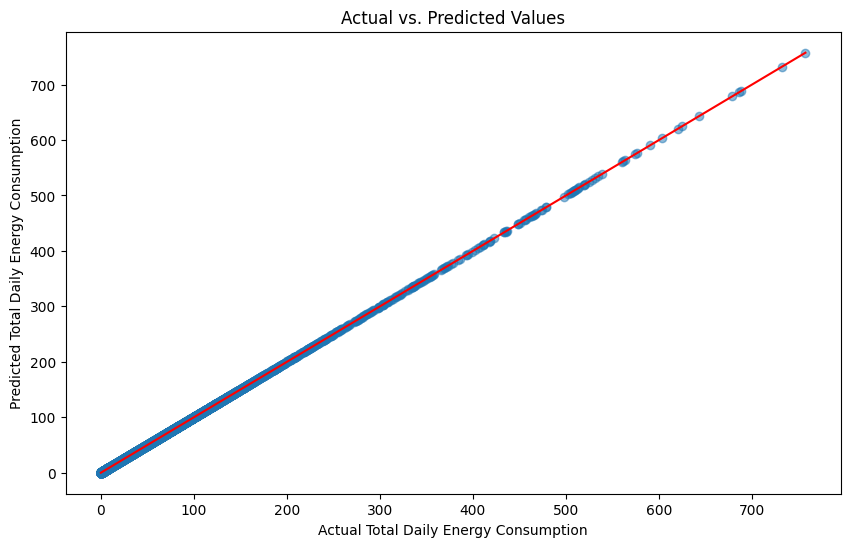

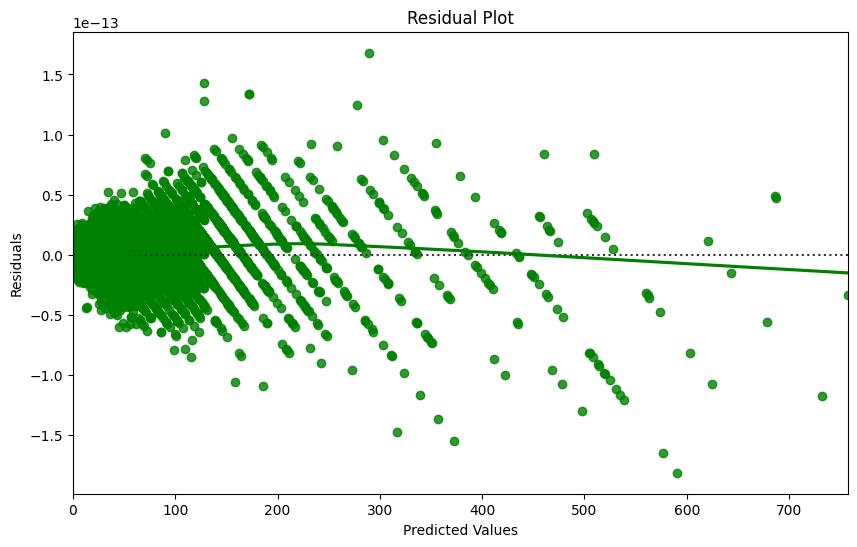

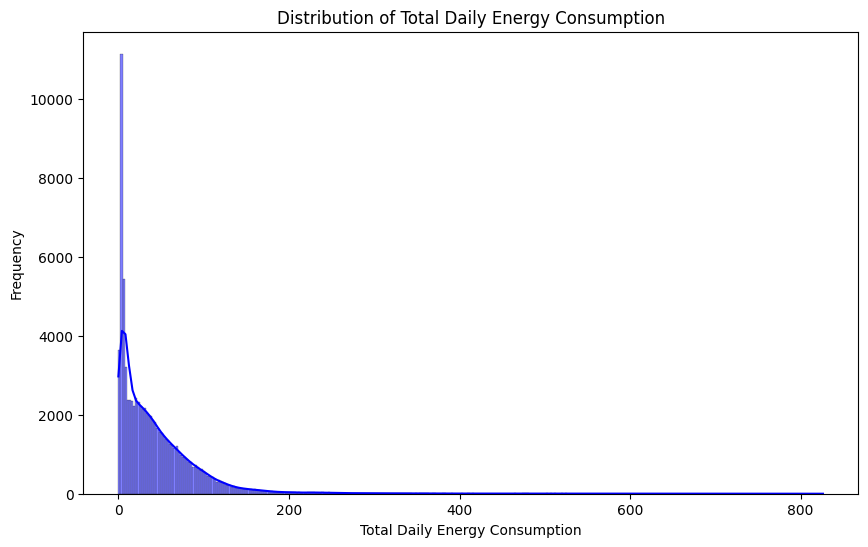

In [19]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For statistical data visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For data preprocessing
from sklearn.linear_model import LinearRegression  # For Linear Regression modeling
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # For regression evaluation metrics

# Convert 'Date' column to datetime with specified format
date_format = "%d/%m/%Y"
energy_data['Date'] = pd.to_datetime(energy_data['Date'], format=date_format)

# Extract time-based features like 'DayOfWeek' and 'Month'
energy_data['DayOfWeek'] = energy_data['Date'].dt.dayofweek
energy_data['Month'] = energy_data['Date'].dt.month

# Encode categorical features and drop original columns
categorical_features = ['Flats Category', 'Seasons', 'Periods']  # Adjust based on actual column names
one_hot_encoder = OneHotEncoder()
encoded_features = one_hot_encoder.fit_transform(energy_data[categorical_features])
encoded_features_df = pd.DataFrame(encoded_features.toarray(), columns=one_hot_encoder.get_feature_names_out(categorical_features))
energy_data = pd.concat([energy_data, encoded_features_df], axis=1)
energy_data.drop(columns=categorical_features, inplace=True)

# Standardize numerical features
numerical_features = ['12.00 AM', '1.00 AM', '2.00 AM', '3.00 AM']  # Add all relevant columns
scaler = StandardScaler()
energy_data[numerical_features] = scaler.fit_transform(energy_data[numerical_features])

# Define features and target variable
excluded_columns = ['TotaldailyenergyConsumption', 'Smart Meter Id', 'Address', 'Street', 'Building Name', 'Building Code', 'Date']  # Exclude non-relevant columns
X = energy_data.drop(columns=excluded_columns)
y = energy_data['TotaldailyenergyConsumption']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print out the metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Visualization of the model's performance

# 1. Scatter plot of Actual vs. Predicted values
# 2. Residual Plot
# 3. Histogram of the Target Variable

# Display scatter plot of Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Total Daily Energy Consumption')
plt.ylabel('Predicted Total Daily Energy Consumption')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line showing perfect predictions
plt.show()

# Display residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="g")
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Display histogram of the Target Variable
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, color='blue')
plt.title('Distribution of Total Daily Energy Consumption')
plt.xlabel('Total Daily Energy Consumption')
plt.ylabel('Frequency')
plt.show()

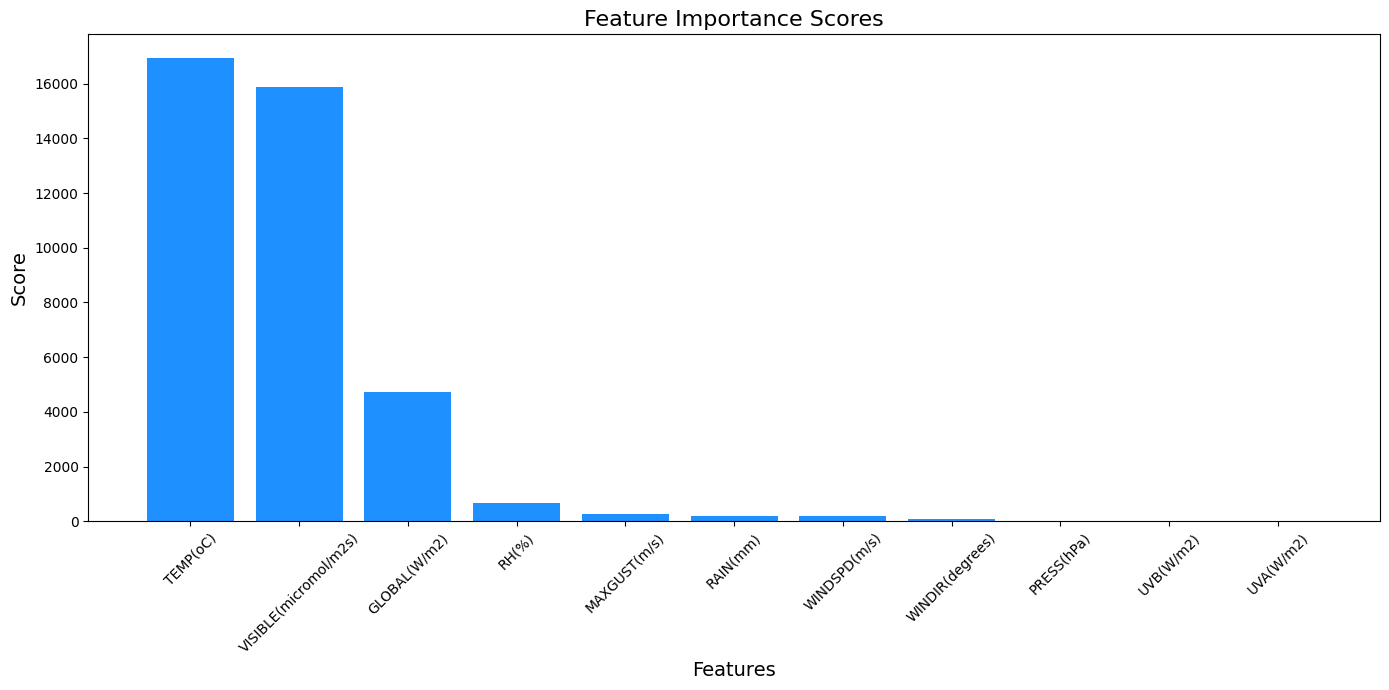


Feature Importance Scores:
                  Feature         Score
0                TEMP(oC)  1.696166e+04
1                   RH(%)  6.626112e+02
2            WINDSPD(m/s)  1.759267e+02
3         WINDIR(degrees)  7.347313e+01
4            GLOBAL(W/m2)  4.722089e+03
5               UVA(W/m2)  0.000000e+00
6               UVB(W/m2)  4.184337e-16
7   VISIBLE(micromol/m2s)  1.588101e+04
8                RAIN(mm)  2.064613e+02
9              PRESS(hPa)  1.880367e+01
10           MAXGUST(m/s)  2.487382e+02


In [20]:
# Select the target variable from the merged dataset
y = merged_data['TotaldailyenergyConsumption']

# Select features from the weather dataset
X_weather = merged_data[['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']].dropna()

# Use SelectKBest to select the most influential weather features
k = 'all'  # 'all' selects all features, adjust to a specific number to reduce features
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X_weather, y)

# Get the scores for each feature
feature_scores = selector.scores_

# Combine the scores with the column names into a DataFrame
features_scores_df = pd.DataFrame({'Feature': X_weather.columns, 'Score': feature_scores})

# Sort the dataframe by score in descending order for better visualization
features_scores_df = features_scores_df.sort_values(by='Score', ascending=False)

# Create a bar plot to visualize feature importance scores
plt.figure(figsize=(14, 7))
plt.bar(features_scores_df['Feature'], features_scores_df['Score'], color='dodgerblue')

# Add labels and title to the plot
plt.xlabel('Features', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Feature Importance Scores', fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#################################
# Get the scores for each feature
# feature_scores = selector.scores_

# Combine the scores with the column names into a DataFrame
features_scores_df = pd.DataFrame({'Feature': X_weather.columns, 'Score': feature_scores})

# Print the feature scores
print("\nFeature Importance Scores:")
print(features_scores_df)


University Flats - TEMP(oC): Coef: -5.011633949529759, Intercept: 101.20132548873991, R^2: 0.14546972365642108
Residential College - TEMP(oC): Coef: -6.791933182588857, Intercept: 129.03429294946952, R^2: 0.19085775420198237
University Flats - RH(%): Coef: -0.36016658329740414, Intercept: 69.91433591303233, R^2: 0.006784891860464826
Residential College - RH(%): Coef: -0.4855691303288963, Intercept: 86.44014405960901, R^2: 0.008809419821407372
University Flats - WINDSPD(m/s): Coef: 1.3996391949084113, Intercept: 39.042389090346205, R^2: 0.0017830151173168218
Residential College - WINDSPD(m/s): Coef: 1.9166775681314596, Intercept: 44.744613863468054, R^2: 0.0023885262853273748
University Flats - WINDIR(degrees): Coef: 0.014610546190448714, Intercept: 39.97284602100537, R^2: 0.0007266302524011614
Residential College - WINDIR(degrees): Coef: 0.020514362999040744, Intercept: 45.9291964186871, R^2: 0.001023306458354134
University Flats - GLOBAL(W/m2): Coef: 353.1917668948276, Intercept: -244

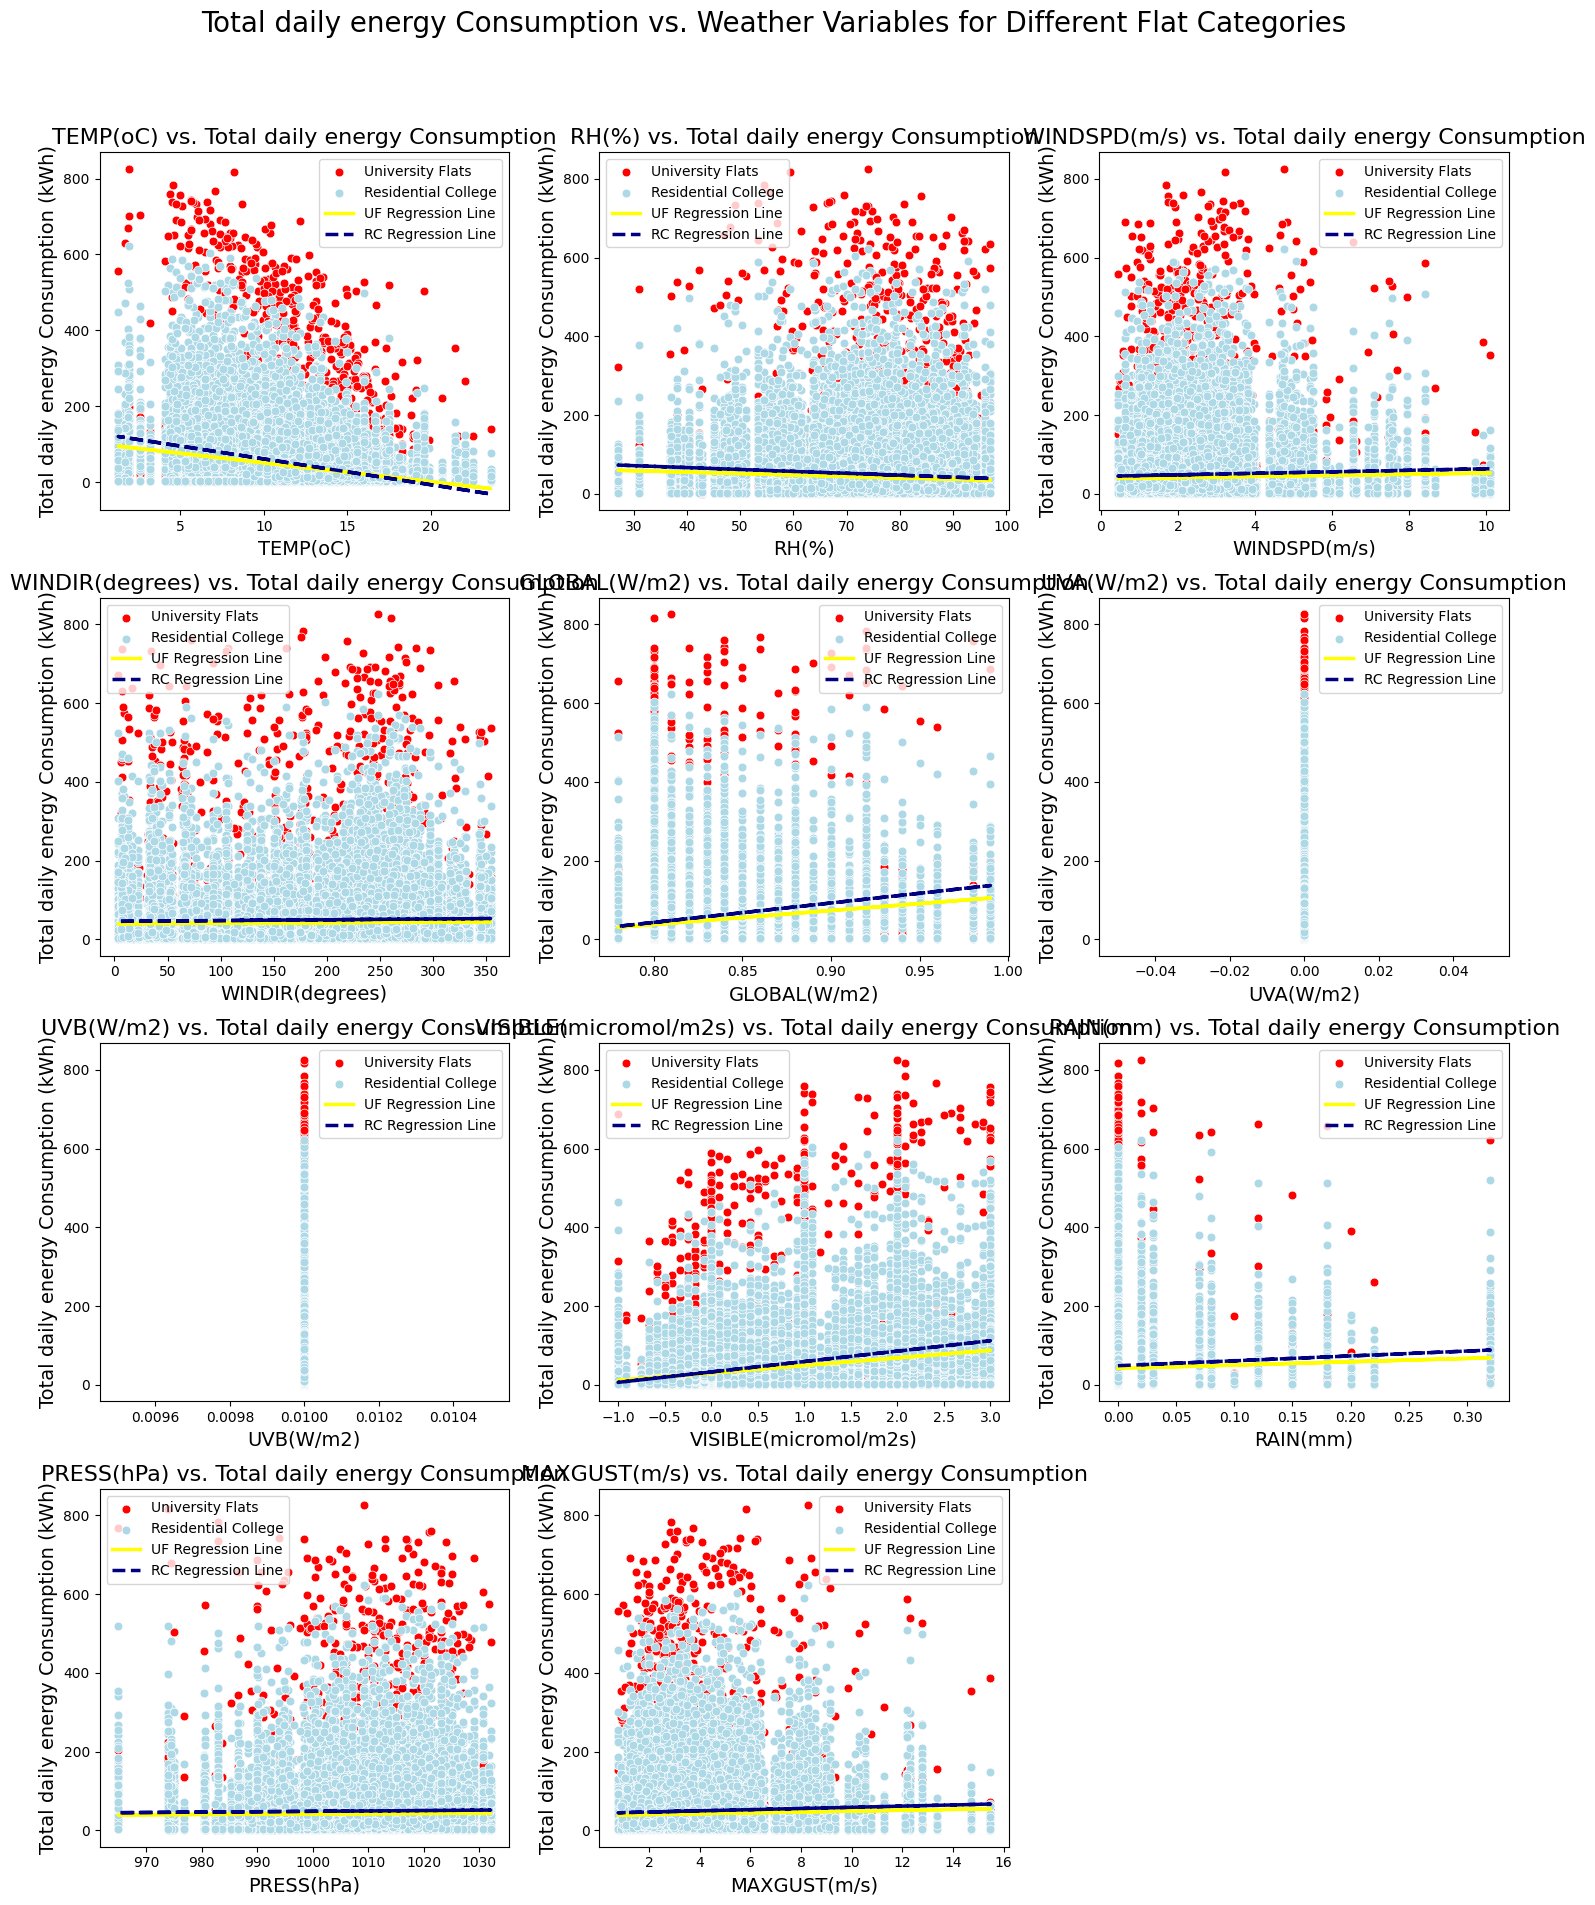

In [21]:
# Separate the data based on 'Flats Category'
university_flats = merged_data[merged_data['Flats Category'] == 'University Flats']
residential_college = merged_data[merged_data['Flats Category'] == 'Residential College']

# Selected weather variables for analysis
selected_vars = ['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']

# Create a grid of subplots with 3 columns and 4 rows
fig, axs = plt.subplots(4, 3, figsize=(15, 20))  # 3 columns and 4 rows for the selected variables
axs = axs.flatten()

# Loop through each selected weather variable and create subplots
for i, var in enumerate(selected_vars):
    # Prepare data for regression for both categories
    uf_data = university_flats[['TotaldailyenergyConsumption', var]].dropna()
    rc_data = residential_college[['TotaldailyenergyConsumption', var]].dropna()

    # Fit the model for University Flats
    linreg_uf = LinearRegression()
    X_uf = uf_data[[var]]
    y_uf = uf_data['TotaldailyenergyConsumption']
    linreg_uf.fit(X_uf, y_uf)

    # Fit the model for Residential College
    linreg_rc = LinearRegression()
    X_rc = rc_data[[var]]
    y_rc = rc_data['TotaldailyenergyConsumption']
    linreg_rc.fit(X_rc, y_rc)
    # Print the stats for University Flats and Residential College
    # University Flats stats
    uf_coef = linreg_uf.coef_[0]
    uf_intercept = linreg_uf.intercept_
    uf_r_squared = linreg_uf.score(X_uf, y_uf)
    print(f'University Flats - {var}: Coef: {uf_coef}, Intercept: {uf_intercept}, R^2: {uf_r_squared}')
    # Residential College stats
    rc_coef = linreg_rc.coef_[0]
    rc_intercept = linreg_rc.intercept_
    rc_r_squared = linreg_rc.score(X_rc, y_rc)
    print(f'Residential College - {var}: Coef: {rc_coef}, Intercept: {rc_intercept}, R^2: {rc_r_squared}')

    # Scatter plot with regression line in a subplot for University Flats
    sns.scatterplot(x=var, y='TotaldailyenergyConsumption', data=uf_data, ax=axs[i], color='red', s=40, label='University Flats')
    # Scatter plot with regression line in a subplot for Residential College
    sns.scatterplot(x=var, y='TotaldailyenergyConsumption', data=rc_data, ax=axs[i], color='lightblue', s=40, label='Residential College')

    # Add regression lines
    axs[i].plot(X_uf, linreg_uf.predict(X_uf), color='yellow', linewidth=2.5, label='UF Regression Line')
    axs[i].plot(X_rc, linreg_rc.predict(X_rc), color='navy', linewidth=2.5, linestyle='--', label='RC Regression Line')

    axs[i].set_title(f'{var} vs. Total daily energy Consumption', fontsize=16)
    axs[i].set_xlabel(var, fontsize=14)
    axs[i].set_ylabel('Total daily energy Consumption (kWh)', fontsize=14)
    axs[i].legend()

# Hide any unused subplots (if any)
for j in range(len(selected_vars), len(axs)):
    axs[j].axis('off')

# Add a master title to the figure
fig.suptitle('Total daily energy Consumption vs. Weather Variables for Different Flat Categories', fontsize=20)
# Adjust the layout and display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [22]:
# Display columns of the university_flats DataFrame
print(university_flats.columns)

Index(['Smart Meter Id', 'Flats Category', 'Address', 'Street',
       'Building Name', 'Building Code', 'Periods', 'Seasons', 'Date',
       'TotaldailyenergyConsumption', '12.00 AM', '1.00 AM', '2.00 AM',
       '3.00 AM', '4.00 AM', '5.00 AM', '6.00 AM', '7.00 AM', '8.00 AM',
       '9.00 AM', '10.00 AM', '11.00 AM', '12.00 PM', '1.00 PM', '2.00 PM',
       '3.00 PM', '4.00 PM', '5.00 PM', '6.00 PM', '7.00 PM', '8.00 PM',
       '9.00 PM', '10.00 PM', '11.00 PM', 'DayOfWeek', 'Month',
       'DATE(dd/mm/yy)', 'TIME', 'TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)',
       'WINDIR(degrees)', 'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)',
       'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)',
       'Datetime'],
      dtype='object')


#Multiple Regression

In [23]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Select relevant features (excluding non-numeric or target columns)
selected_features = ['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']

# Additional features you may want to include: 'Street', 'Seasons', 'Datetime', etc.

# Drop rows with missing values in the selected features and target variable
# Here, the DataFrame 'university_flats' is assumed to have these selected features and the target variable 'TotaldailyenergyConsumption'
df = university_flats.dropna(subset=selected_features + ['TotaldailyenergyConsumption'])

# Separate features (X) and target variable (y)
X = df[selected_features]  # Features for the model
y = df['TotaldailyenergyConsumption']  # Target variable to predict

# Split the data into training and testing sets
# The test_size is set to 20%, meaning 80% will be used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()  # Initializing Linear Regression model

# Train the model using the training data
model.fit(X_train, y_train)  # Fitting the model with the training data

# Make predictions on the test set
y_pred = model.predict(X_test)  # Predicting on the test set

# Evaluate the model
# Printing the Mean Absolute Error and Root Mean Squared Error as metrics for model evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

# You can now use the trained model to make predictions on new data
# For example, if you have new feature values, you can predict TotaldailyenergyConsumption using model.predict(new_data)

Mean Absolute Error: 24.337642406559187
Root Mean Squared Error: 46.268379652855096


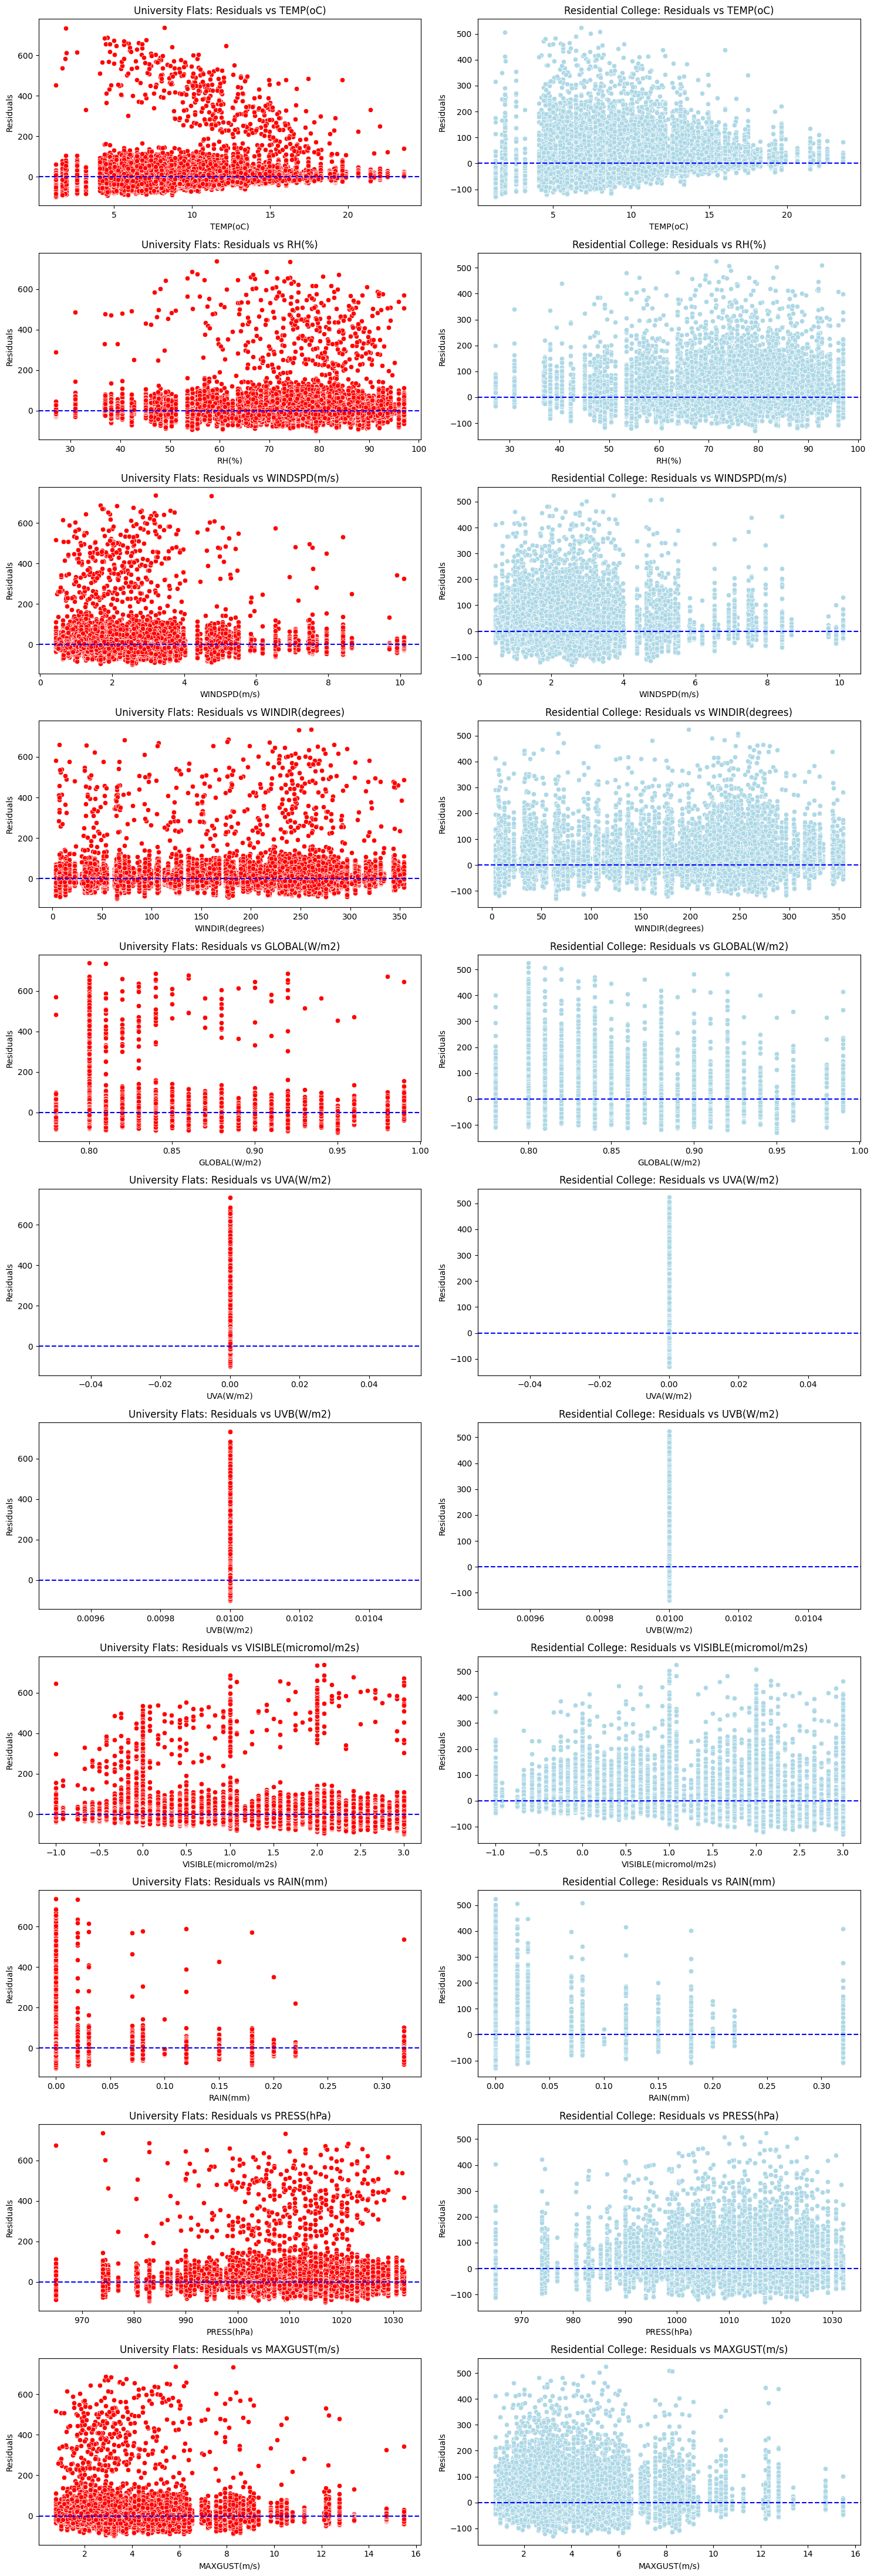

In [24]:
# Selecting all weather variables as features
weather_vars = ['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)',
                'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']

# Prepare data for regression for both categories
# Drop rows with missing values in selected weather variables and the target variable
uf_data = university_flats[weather_vars + ['TotaldailyenergyConsumption']].dropna()
rc_data = residential_college[weather_vars + ['TotaldailyenergyConsumption']].dropna()

# Fit the model for University Flats
X_uf = uf_data[weather_vars]  # Features for University Flats
y_uf = uf_data['TotaldailyenergyConsumption']  # Target variable for University Flats
linreg_uf = LinearRegression().fit(X_uf, y_uf)  # Fitting Linear Regression for University Flats

# Fit the model for Residential College
X_rc = rc_data[weather_vars]  # Features for Residential College
y_rc = rc_data['TotaldailyenergyConsumption']  # Target variable for Residential College
linreg_rc = LinearRegression().fit(X_rc, y_rc)  # Fitting Linear Regression for Residential College

# Create subplots based on the number of selected variables
fig, axs = plt.subplots(len(weather_vars), 2, figsize=(15, len(weather_vars) * 4))  # Subplots for UF and RC

# Loop through each selected weather variable and create subplots
for i, var in enumerate(weather_vars):
    # Calculate residuals
    uf_residuals = y_uf - linreg_uf.predict(X_uf)
    rc_residuals = y_rc - linreg_rc.predict(X_rc)

    # Residual plot for University Flats
    sns.scatterplot(x=X_uf[var], y=uf_residuals, ax=axs[i][0], color='red')
    axs[i][0].set_title(f'University Flats: Residuals vs {var}')
    axs[i][0].set_xlabel(var)
    axs[i][0].set_ylabel('Residuals')
    axs[i][0].axhline(y=0, color='blue', linestyle='--')

    # Residual plot for Residential College
    sns.scatterplot(x=X_rc[var], y=rc_residuals, ax=axs[i][1], color='lightblue')
    axs[i][1].set_title(f'Residential College: Residuals vs {var}')
    axs[i][1].set_xlabel(var)
    axs[i][1].set_ylabel('Residuals')
    axs[i][1].axhline(y=0, color='blue', linestyle='--')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [25]:
# Statistics function to print model information
def print_model_stats(model, X, y, category_name, var):
    # Obtain coefficients, intercept, and R-squared for the model
    coef = model.coef_
    intercept = model.intercept_
    r_squared = model.score(X, y)

    # Print statistics for the specific category and variable
    print(f"{category_name} - {var}")
    print(f"  Coefficients: {coef}")
    print(f"  Intercept: {intercept}")
    print(f"  R-squared: {r_squared}\n")

# Loop through each selected weather variable
for var in selected_vars:
    # Fit linear regression model for University Flats using the current weather variable
    X_uf = uf_data[[var]]  # Feature for University Flats
    y_uf = uf_data['TotaldailyenergyConsumption']  # Target variable for University Flats
    linreg_uf = LinearRegression().fit(X_uf, y_uf)  # Fitting Linear Regression for University Flats
    # Print statistics for University Flats
    print_model_stats(linreg_uf, X_uf, y_uf, "University Flats", var)

    # Fit linear regression model for Residential College using the current weather variable
    X_rc = rc_data[[var]]  # Feature for Residential College
    y_rc = rc_data['TotaldailyenergyConsumption']  # Target variable for Residential College
    linreg_rc = LinearRegression().fit(X_rc, y_rc)  # Fitting Linear Regression for Residential College
    # Print statistics for Residential College
    print_model_stats(linreg_rc, X_rc, y_rc, "Residential College", var)

University Flats - TEMP(oC)
  Coefficients: [-5.01163395]
  Intercept: 101.20132548873991
  R-squared: 0.14546972365642108

Residential College - TEMP(oC)
  Coefficients: [-6.79193318]
  Intercept: 129.03429294946952
  R-squared: 0.19085775420198237

University Flats - RH(%)
  Coefficients: [-0.36016658]
  Intercept: 69.91433591303233
  R-squared: 0.006784891860464826

Residential College - RH(%)
  Coefficients: [-0.48556913]
  Intercept: 86.44014405960901
  R-squared: 0.008809419821407372

University Flats - WINDSPD(m/s)
  Coefficients: [1.39963919]
  Intercept: 39.042389090346205
  R-squared: 0.0017830151173168218

Residential College - WINDSPD(m/s)
  Coefficients: [1.91667757]
  Intercept: 44.744613863468054
  R-squared: 0.0023885262853273748

University Flats - WINDIR(degrees)
  Coefficients: [0.01461055]
  Intercept: 39.97284602100537
  R-squared: 0.0007266302524011614

Residential College - WINDIR(degrees)
  Coefficients: [0.02051436]
  Intercept: 45.9291964186871
  R-squared: 0.

#Logistic

Confusion Matrix:
[[10162  2769]
 [ 4061  8871]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75     12931
           1       0.76      0.69      0.72     12932

    accuracy                           0.74     25863
   macro avg       0.74      0.74      0.74     25863
weighted avg       0.74      0.74      0.74     25863


Additional Metrics:
Accuracy: 0.74
Precision: 0.76
Recall: 0.69
F1 Score: 0.72
RMSE of probabilities: 0.42


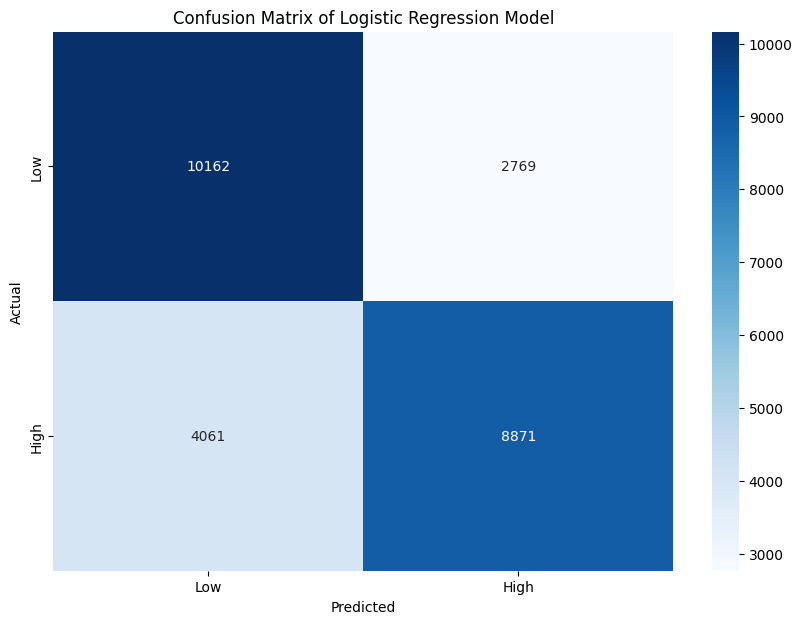

In [26]:
# Import necessary libraries
from sklearn.model_selection import train_test_split  # Import function for splitting data
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression model
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score, mean_squared_error) # Import metrics for evaluation
from math import sqrt  # Import square root function from math module
import matplotlib.pyplot as plt  # Import plotting library
import seaborn as sns  # Import Seaborn for visualization

# Convert 'TotaldailyenergyConsumption' to a binary variable based on the median
median_energy = merged_data['TotaldailyenergyConsumption'].median()  # Calculate the median
merged_data['HighEnergyConsumption'] = np.where(merged_data['TotaldailyenergyConsumption'] >= median_energy, 1, 0)
# Create a new column indicating high/low energy consumption based on the median

# Selecting the weather variables as predictors
predictors = ['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)',
              'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']

# Preparing the data for logistic regression, handling missing values by replacing them with mean
X = merged_data[predictors].fillna(merged_data[predictors].mean())
y = merged_data['HighEnergyConsumption']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model initialization and fitting
logreg = LogisticRegression(max_iter=1000)  # Initialize logistic regression model
logreg.fit(X_train, y_train)  # Fit logistic regression model

# Predictions for classes and probabilities
y_pred = logreg.predict(X_test)  # Predicted classes
y_pred_proba = logreg.predict_proba(X_test)[:, 1]  # Predicted probabilities of the positive class

# Model Evaluation metrics calculation
conf_matrix = confusion_matrix(y_test, y_pred)  # Calculate confusion matrix
class_report = classification_report(y_test, y_pred)  # Generate classification report
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
precision = precision_score(y_test, y_pred)  # Calculate precision
recall = recall_score(y_test, y_pred)  # Calculate recall
f1 = f1_score(y_test, y_pred)  # Calculate F1 score
rmse = sqrt(mean_squared_error(y_test, y_pred_proba))  # Calculate RMSE of predicted probabilities

# Output the evaluation results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAdditional Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"RMSE of probabilities: {rmse:.2f}")

# Plotting the Confusion Matrix
plt.figure(figsize=(10, 7))  # Set the figure size
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',  # Create a heatmap of the confusion matrix
            xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')  # Set x-axis label
plt.ylabel('Actual')  # Set y-axis label
plt.title('Confusion Matrix of Logistic Regression Model')  # Set title of the plot
plt.show()  # Display the plot


In [27]:
# Import necessary libraries
import pandas as pd  # Import pandas for data handling
from sklearn.model_selection import train_test_split  # Import function for splitting data
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor model
from sklearn.metrics import mean_squared_error, r2_score  # Import evaluation metrics

# Selecting features and target variable
features = merged_data[['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']]  # Select specific columns as features
target = merged_data['TotaldailyenergyConsumption']  # Define the target variable

# Handling missing values by replacing them with the mean
features = features.fillna(features.mean())  # Replace missing values in features with the mean
target = target.fillna(target.mean())  # Replace missing values in target with the mean

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)  # Split the data

# Random Forest model initialization and training
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)  # Initialize RandomForestRegressor
rf_model.fit(X_train, y_train)  # Train the model

# Predicting on the test set
y_pred = rf_model.predict(X_test)  # Make predictions

# Calculate R2 Score
r2 = r2_score(y_test, y_pred)  # Calculate R2 Score

# Output the R2 Score
print(f'R2 Score: {r2}')

# Calculate and print the Root Mean Squared Error
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))

R2 Score: 0.3022654318414235
Root Mean Squared Error: 45.139243428475424


In [28]:
# Import necessary libraries
import pandas as pd  # For data handling
import numpy as np  # For numerical operations
from sklearn.model_selection import cross_val_score, train_test_split  # For cross-validation and data splitting
from sklearn.ensemble import RandomForestRegressor  # For RandomForestRegressor model
from sklearn.metrics import mean_squared_error  # For mean_squared_error metric

# Selecting features and target variable
features = merged_data[['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']]  # Select specific columns as features
target = merged_data['TotaldailyenergyConsumption']  # Define the target variable

# Handling missing values by replacing them with the mean
features = features.fillna(features.mean())  # Replace missing values in features with the mean
target = target.fillna(target.mean())  # Replace missing values in target with the mean

# Set the random seed for reproducibility
np.random.seed(1)

# Initialize the Random Forest regressor with specified parameters
forest = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)

# Perform 10-fold cross-validation and compute the RMSE for each fold
rmse_scores = cross_val_score(forest, features, target, scoring='neg_root_mean_squared_error', cv=10)

# The 'cross_val_score' function returns negative values for RMSE because it is a 'loss' and
# lower is better. To report the RMSE in positive terms, we'll take the absolute value.
rmse_scores = -rmse_scores

# Calculate the mean RMSE across all folds
mean_rmse = np.mean(rmse_scores)

# Calculate the standard error of the RMSE across all folds
se_rmse = np.std(rmse_scores) / np.sqrt(len(rmse_scores))

# Output the mean RMSE from cross-validation and its standard error
print(f"Mean RMSE from cross-validation: {mean_rmse:.3f}")
print(f"Standard Error of RMSE from cross-validation: {se_rmse:.3f}")

# Fitting the model on the entire dataset
forest.fit(features, target)

# Predictions using the fitted model on the same data used for training
predictions = forest.predict(features)

# Calculate Mean Squared Error (MSE) for model evaluation on the training data
mse = mean_squared_error(target, predictions)

# Output the MSE as an evaluation metric
print('Mean Squared Error:', mse)

Mean RMSE from cross-validation: 42.371
Standard Error of RMSE from cross-validation: 6.496
Mean Squared Error: 2183.6080987828627


In [29]:
# Importing necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split, GridSearchCV  # For data splitting and grid search
from sklearn.ensemble import RandomForestRegressor  # For RandomForestRegressor model
from sklearn.metrics import mean_squared_error  # For mean_squared_error metric

# Selecting features and target variable
features = merged_data[['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']]  # Selecting specific columns as features
target = merged_data['TotaldailyenergyConsumption']  # Defining the target variable

# Handling missing values by replacing them with the mean
features = features.fillna(features.mean())  # Replace missing values in features with the mean
target = target.fillna(target.mean())  # Replace missing values in target with the mean

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Manual Tuning - Adjusting hyperparameters iteratively
best_model_params = {  # Initialize a dictionary to store the best parameters and corresponding RMSE
    'n_estimators': 10,  # default value
    'max_depth': None,  # default value
    'min_samples_split': 2,  # default value
    'min_samples_leaf': 1,  # default value
    'best_rmse': np.inf  # Placeholder for the best RMSE
}
for n_estimators in [10, 50, 100]:  # Iterate through different values for 'n_estimators'
    for max_depth in [None, 10, 20, 30]:  # Iterate through different values for 'max_depth'
        for min_samples_split in [2, 5, 10]:  # Iterate through different values for 'min_samples_split'
            for min_samples_leaf in [1, 2, 4]:  # Iterate through different values for 'min_samples_leaf'
                # Initialize the Random Forest regressor with specified parameters
                forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                               min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                               random_state=42)

                # Fit the model on training data
                forest.fit(X_train, y_train)

                # Make predictions on the testing set
                predictions = forest.predict(X_test)

                # Calculate the RMSE
                rmse = np.sqrt(mean_squared_error(y_test, predictions))

                # Update best_model_params if current model is better
                if rmse < best_model_params['best_rmse']:
                    best_model_params.update({
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'best_rmse': rmse
                    })

# Output the best parameters and corresponding RMSE
print("Best Parameters:")
print(f"Number of Estimators: {best_model_params['n_estimators']}")
print(f"Max Depth: {best_model_params['max_depth']}")
print(f"Min Samples Split: {best_model_params['min_samples_split']}")
print(f"Min Samples Leaf: {best_model_params['min_samples_leaf']}")
#print(f"Best RMSE: {best_model_params['best_rmse']:.3f}")
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions,squared=False))
# You can retrain your final model using these best parameters on the full dataset or just the training set as needed.

Best Parameters:
Number of Estimators: 50
Max Depth: 20
Min Samples Split: 2
Min Samples Leaf: 1
Mean Squared Error: 45.42377617457682


In [30]:

from sklearn.model_selection import cross_val_score  # For cross-validation
from sklearn.linear_model import Ridge  # For Ridge regression
from sklearn.metrics import mean_squared_error  # For mean squared error metric

# Selecting features and target variable
features = merged_data[['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']]  # Selecting specific columns as features
target = merged_data['TotaldailyenergyConsumption']  # Defining the target variable
# Handling missing values by replacing them with the mean
features = features.fillna(features.mean())  # Replace missing values in features with the mean
target = target.fillna(target.mean())  # Replace missing values in target with the mean

# Set the random seed for reproducibility
np.random.seed(1)

# Initialize the Ridge regressor with specified parameters
ridge = Ridge(alpha=1.0)  # Alpha (regularization strength) set to 1.0

# Perform 10-fold cross-validation and compute the RMSE for each fold
rmse_scores = cross_val_score(ridge, features, target, scoring='neg_root_mean_squared_error', cv=10)

# The 'cross_val_score' function returns negative values for RMSE because it is a 'loss' and
# lower is better. To report the RMSE in positive terms, we'll take the absolute value.
rmse_scores = -rmse_scores

# Calculate the mean RMSE across all folds
mean_rmse = np.mean(rmse_scores)

# Calculate the standard error of the RMSE across all folds
se_rmse = np.std(rmse_scores) / np.sqrt(len(rmse_scores))

# Output the mean RMSE from cross-validation and its standard error
print(f"Mean RMSE from cross-validation: {mean_rmse:.3f}")
print(f"Standard Error of RMSE from cross-validation: {se_rmse:.3f}")

# Fitting the model on the entire dataset
ridge.fit(features, target)
# If you just want to see how the model performs on the known data, predict on the same features
predictions = ridge.predict(features)

# The predictions are now the estimated TotaldailyenergyConsumption for each corresponding set of features
# If you want to measure the performance on the known data, calculate the RMSE
mse = mean_squared_error(target, predictions)
rmse = np.sqrt(mse)

# Output the RMSE on the known data
print(f"RMSE on the known data: {rmse:.3f}")


Mean RMSE from cross-validation: 45.755
Standard Error of RMSE from cross-validation: 6.402
RMSE on the known data: 49.790


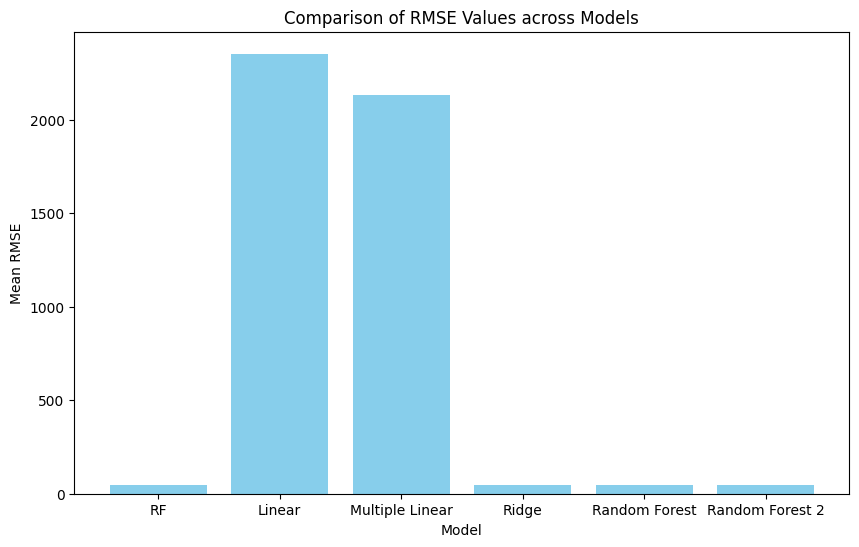

In [31]:
# Importing necessary libraries
import matplotlib.pyplot as plt  # For plotting
import pandas as pd  # For data manipulation

# Data for models and corresponding RMSE values
models = ['RF', 'Linear', 'Multiple Linear', 'Ridge', 'Random Forest', 'Random Forest 2']  # Names of different models
rmse_values = [46.020, 2353, 2132, 47.369, 47.071, 45.503]  # Corresponding RMSE values

# Create a DataFrame to hold the model names and RMSE values
data = {'Model': models, 'Mean RMSE': rmse_values}
df = pd.DataFrame(data)  # Creating a DataFrame using the data

# Plotting a bar plot
plt.figure(figsize=(10, 6))  # Setting the figure size for the plot
plt.bar(df['Model'], df['Mean RMSE'], color='skyblue')  # Creating a bar plot with Model names on x-axis and RMSE values on y-axis

# Add labels and title to the plot
plt.xlabel('Model')  # Label for x-axis
plt.ylabel('Mean RMSE')  # Label for y-axis
plt.title('Comparison of RMSE Values across Models')  # Title of the plot

# Display the plot
plt.show()  # Show the plot

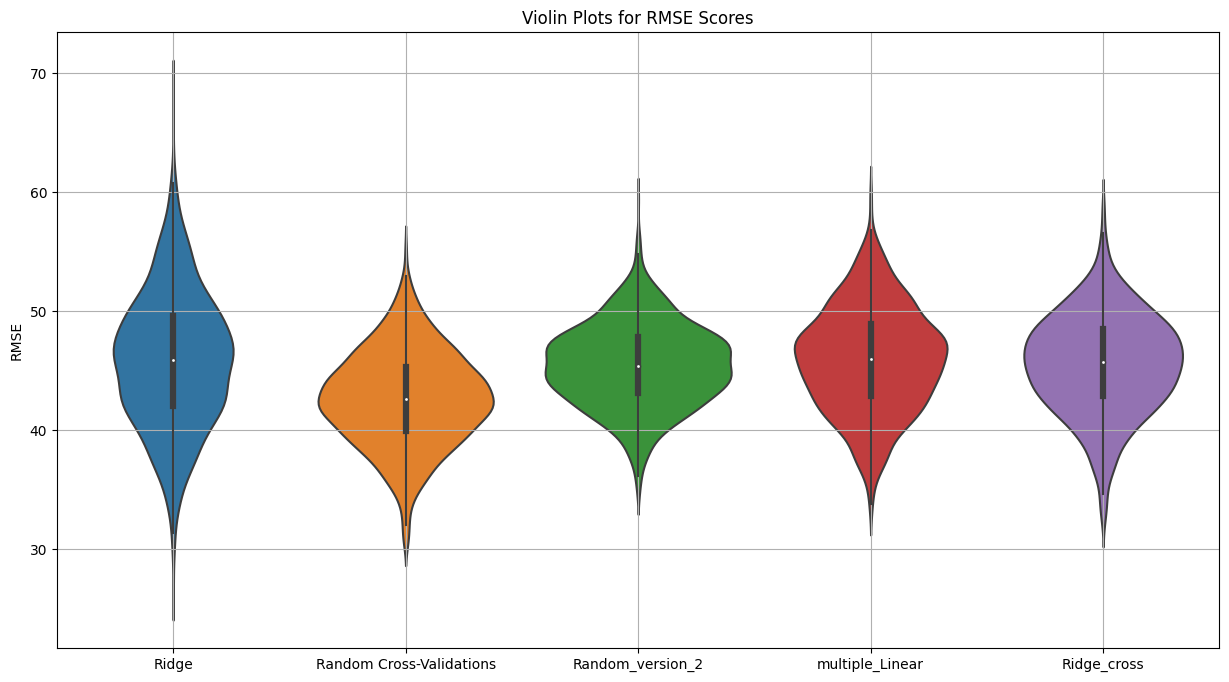

In [32]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For handling data
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced data visualization

# Results for different models (RMSE scores and their standard errors)
ridge_results = {'Mean RMSE': 45.77, 'SE RMSE': 5.826}
Random_cross = {'Mean RMSE': 42.37, 'SE RMSE': 4}
Random_version_2 = {'Mean RMSE': 45.42, 'SE RMSE': 3.56}
linear = {'Mean RMSE': 46, 'SE RMSE': 4.3}
ridge_cross = {'Mean RMSE': 45.755, 'SE RMSE': 4.24}

# Generating random samples based on normal distribution for each model's RMSE scores
np.random.seed(42)

ridge_rmse_scores = np.random.normal(ridge_results['Mean RMSE'], ridge_results['SE RMSE'], 1000)
Random_cross_scores = np.random.normal(Random_cross['Mean RMSE'], Random_cross['SE RMSE'], 1000)
Random_2_scores = np.random.normal(Random_version_2['Mean RMSE'], Random_version_2['SE RMSE'], 1000)
linear_scores = np.random.normal(linear['Mean RMSE'], linear['SE RMSE'], 1000)
ridge_cross_scores = np.random.normal(ridge_cross['Mean RMSE'], ridge_cross['SE RMSE'], 1000)

# Create a DataFrame to hold the RMSE scores for plotting
data_to_plot = {
    'Ridge': ridge_rmse_scores,
    'Random Cross-Validations': Random_cross_scores,
    'Random_version_2': Random_2_scores,
    'multiple_Linear': linear_scores,
    'Ridge_cross': ridge_cross_scores
}
df = pd.DataFrame(data_to_plot)

# Plotting violin plot to visualize the distribution of RMSE scores for different models
plt.figure(figsize=(15, 8))  # Set the size of the plot
sns.violinplot(data=df)  # Creating a violin plot using Seaborn
plt.title('Violin Plots for RMSE Scores')  # Adding a title to the plot
plt.ylabel('RMSE')  # Label for y-axis
plt.grid(True)  # Add gridlines

# Show the plot
plt.show()  # Display the plot


In [33]:
import numpy as np

# Given RMSE values
rmse_values = [2353, 2132]

# Calculate coefficient of variation (CV) for each value
# Compute CV using the formula: standard deviation / mean for each RMSE value
cv_values = [np.std([rmse]) / np.mean([rmse]) for rmse in rmse_values]

# Display the results
# Iterate through each RMSE value and its corresponding CV value, print the results
for i, rmse in enumerate(rmse_values):
    print(f'Coefficient of Variation for RMSE = {rmse}: {cv_values[i]}')

Coefficient of Variation for RMSE = 2353: 0.0
Coefficient of Variation for RMSE = 2132: 0.0


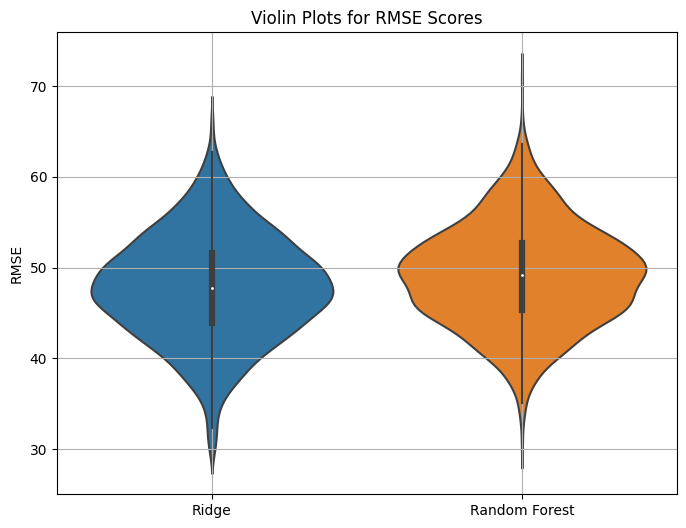

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Results for Random Forest and Ridge Regressor
# Define mean and standard error (SE) of RMSE for each model
rf_results = {'Mean RMSE': 49.020, 'SE RMSE': 5.663}
ridge_results = {'Mean RMSE': 47.369, 'SE RMSE': 5.826}

# Assuming normal distribution for RMSE scores
# Set the random seed for reproducibility
np.random.seed(42)

# Generate random samples from a normal distribution based on mean and SE for each model
rf_rmse_scores = np.random.normal(rf_results['Mean RMSE'], rf_results['SE RMSE'], 1000)
ridge_rmse_scores = np.random.normal(ridge_results['Mean RMSE'], ridge_results['SE RMSE'], 1000)

# Create DataFrame for plotting
# Combine generated RMSE scores into a DataFrame
data_to_plot = {
    'Ridge': ridge_rmse_scores,
    'Random Forest': rf_rmse_scores
}
df = pd.DataFrame(data_to_plot)

# Plotting violin plot
# Set up the figure and plot a violin plot for the RMSE scores of each model
plt.figure(figsize=(8, 6))
sns.violinplot(data=df)
plt.title('Violin Plots for RMSE Scores')
plt.ylabel('RMSE')
# Adding gridlines
plt.grid(True)

# Show the plot
plt.show()

In [35]:
from scipy.stats import mannwhitneyu  # Importing Mann-Whitney U Test
import numpy as np

# Random Forest results - simulated RMSE scores based on mean and standard error
np.random.seed(42)  # For reproducibility
rf_rmse_scores = np.random.normal(49.020, 5.663, 1000)

# Ridge Regressor results - simulated RMSE scores based on mean and standard error
ridge_rmse_scores = np.random.normal(47.369, 5.826, 1000)

# Perform the Mann-Whitney U Test
u_statistic, p_value = mannwhitneyu(rf_rmse_scores, ridge_rmse_scores)

# Output the Mann-Whitney U statistic and p-value
print(f'Mann-Whitney U statistic: {u_statistic}')
print(f'P-value: {p_value}')

# Interpret the significance result
alpha = 0.05  # Set significance level
if p_value < alpha:
    print('There is a statistically significant difference between the two models.')
else:
    print('There is no statistically significant difference between the two models.')

Mann-Whitney U statistic: 563686.0
P-value: 8.146496305041773e-07
There is a statistically significant difference between the two models.


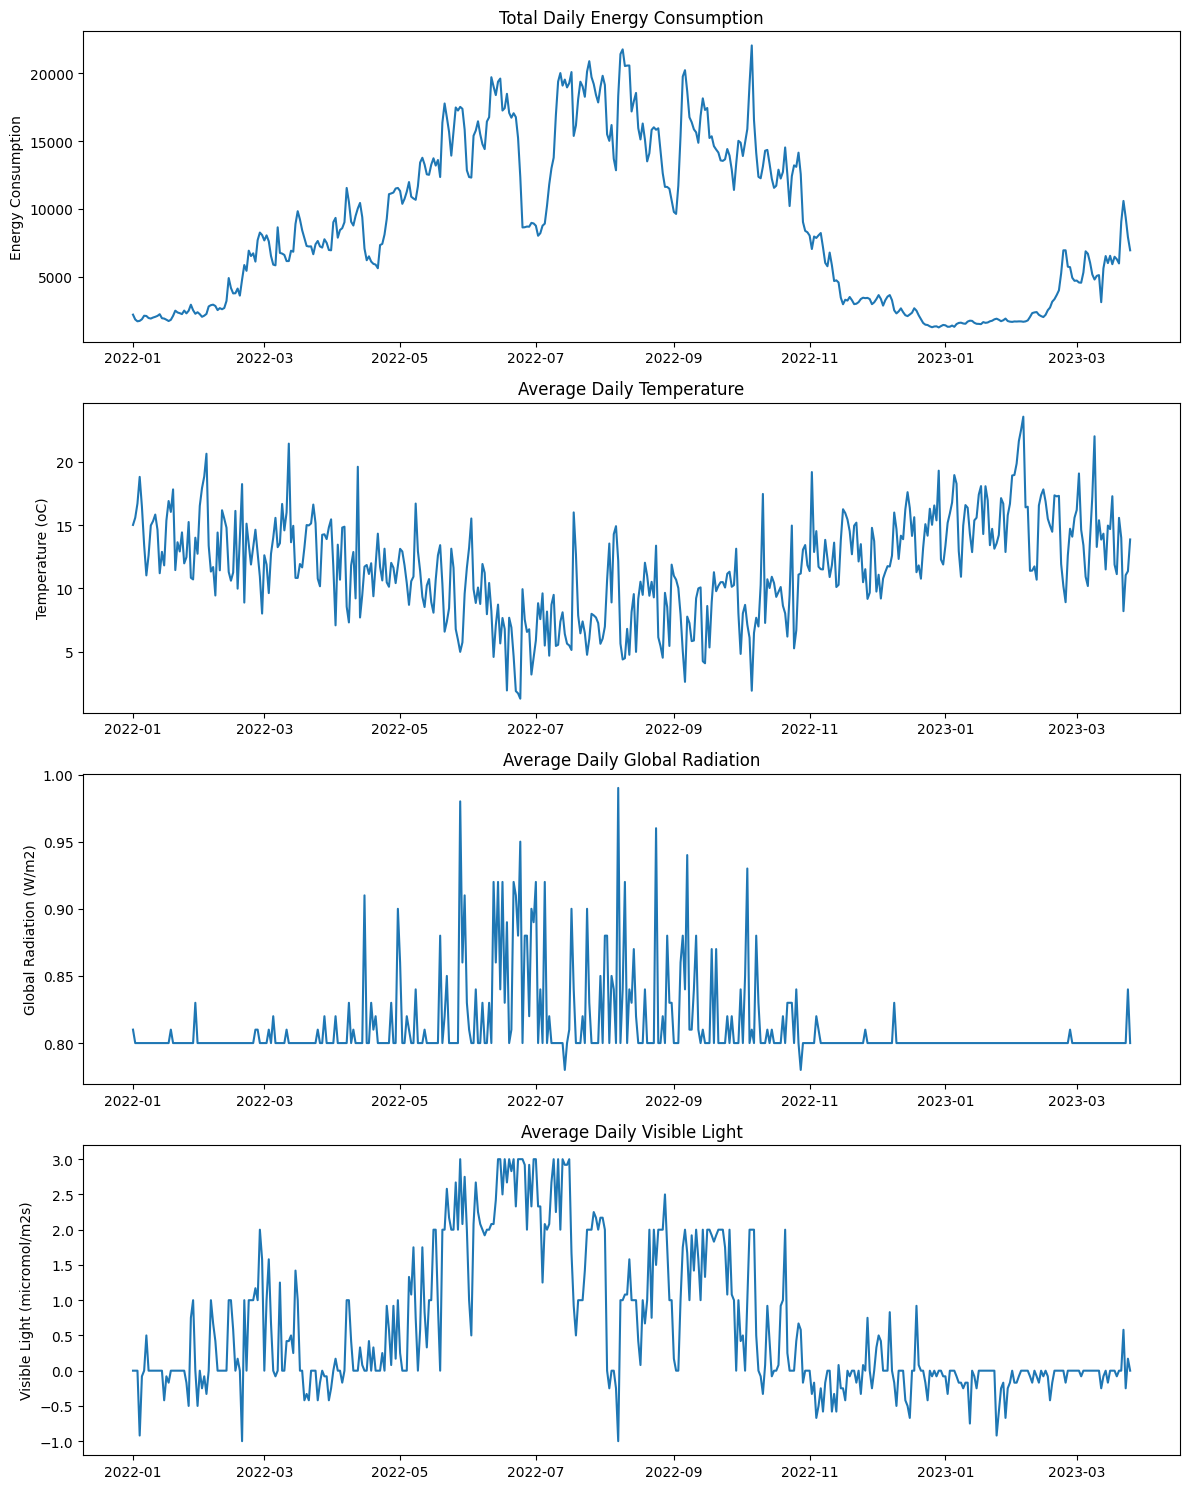

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Selecting relevant columns for the model
model_data = merged_data[['Date', 'TotaldailyenergyConsumption', 'TEMP(oC)', 'GLOBAL(W/m2)', 'VISIBLE(micromol/m2s)']]

# Aggregating weather data to daily level
model_data_daily = model_data.groupby('Date').agg({
    'TotaldailyenergyConsumption': 'sum',
    'TEMP(oC)': 'mean',
    'GLOBAL(W/m2)': 'mean',
    'VISIBLE(micromol/m2s)': 'mean'
}).reset_index()

# Plotting the time series data
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 15))

# Total daily energy consumption
axes[0].plot(model_data_daily['Date'], model_data_daily['TotaldailyenergyConsumption'])
axes[0].set_title('Total Daily Energy Consumption')
axes[0].set_ylabel('Energy Consumption')

# Temperature
axes[1].plot(model_data_daily['Date'], model_data_daily['TEMP(oC)'])
axes[1].set_title('Average Daily Temperature')
axes[1].set_ylabel('Temperature (oC)')

# Global Radiation
axes[2].plot(model_data_daily['Date'], model_data_daily['GLOBAL(W/m2)'])
axes[2].set_title('Average Daily Global Radiation')
axes[2].set_ylabel('Global Radiation (W/m2)')

# Visible Light
axes[3].plot(model_data_daily['Date'], model_data_daily['VISIBLE(micromol/m2s)'])
axes[3].set_title('Average Daily Visible Light')
axes[3].set_ylabel('Visible Light (micromol/m2s)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

ADF Statistic: -2.154261852960306
p-value: 0.22326232406517538


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Best SARIMA Model: ARIMA(1, 1, 2)x(1, 1, 2, 12) with AIC 2628.2722515794717


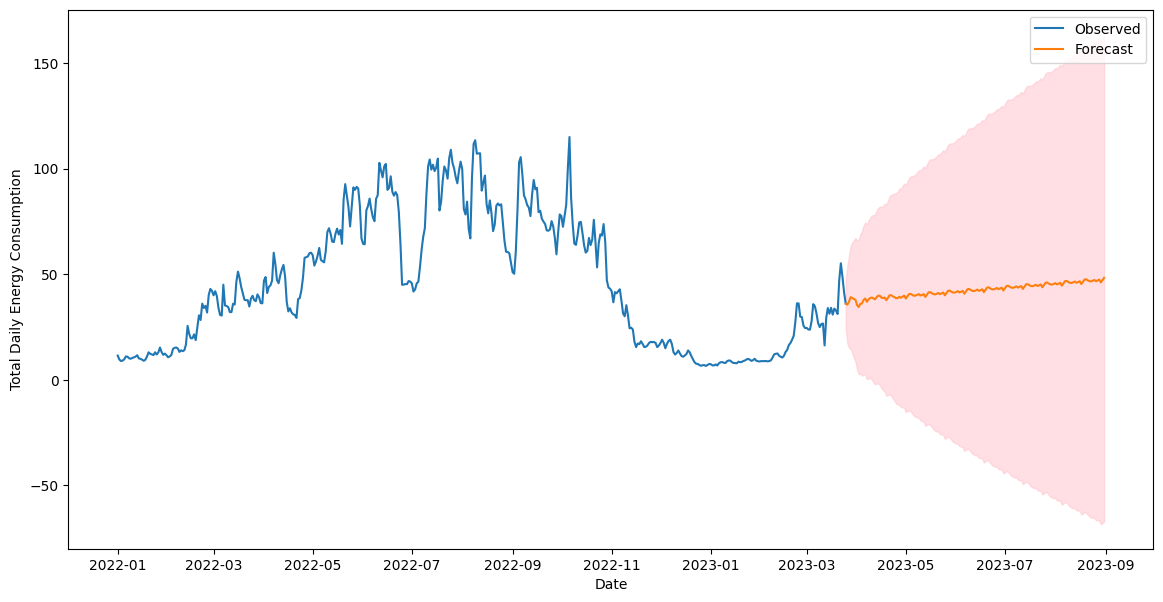

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import itertools
import matplotlib.pyplot as plt
import numpy as np

# Selecting relevant columns for the model
model_data = merged_data[['Date', 'TotaldailyenergyConsumption', 'TEMP(oC)', 'GLOBAL(W/m2)', 'VISIBLE(micromol/m2s)']]
model_data.set_index('Date', inplace=True)

# Aggregate data to daily level if needed
daily_data = model_data.resample('D').mean()

# The SARIMA model requires a stationary time series. Perform stationarity check
ts_energy_consumption = daily_data['TotaldailyenergyConsumption'].dropna()
adf_test = adfuller(ts_energy_consumption, autolag='AIC')
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

# Determine the SARIMA parameters (p, d, q) and (P, D, Q, s)
p = d = q = range(0, 3)
seasonal_period = 12  # Assuming monthly seasonality
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], seasonal_period) for x in pdq]

best_aic = float("inf")
best_pdq = None
best_seasonal_pdq = None
best_model = None

# Grid search for the optimal SARIMA parameters
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(ts_energy_consumption,
                          order=param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility=False)

            results = mod.fit(disp=False)

            # Compare AIC to find the best model
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_model = results
        except:
            continue

print(f"Best SARIMA Model: ARIMA{best_pdq}x{best_seasonal_pdq} with AIC {best_aic}")

# Fit the best SARIMA model
best_model = SARIMAX(ts_energy_consumption,
                     order=best_pdq,
                     seasonal_order=best_seasonal_pdq,
                     enforce_stationarity=False,
                     enforce_invertibility=False)
results = best_model.fit(disp=False)

# Forecast future values for the next 15 months
#n_forecast = 15 * 30  # Approximately 15 months assuming roughly 30 days per month

n_forecast = 160
forecast = results.get_forecast(steps=n_forecast)
forecast_index = pd.date_range(start=ts_energy_consumption.index[-1], periods=n_forecast, freq='D')
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot the original time series and the forecast
plt.figure(figsize=(14, 7))
plt.plot(ts_energy_consumption.index, ts_energy_consumption, label='Observed')
plt.plot(forecast_index, forecast_values, label='Forecast')
plt.fill_between(forecast_index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='pink', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Total Daily Energy Consumption')
plt.legend()
plt.show()


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Selecting relevant features
features = ['TEMP(oC)', 'GLOBAL(W/m2)', 'VISIBLE(micromol/m2s)']
target = 'TotaldailyenergyConsumption'

# Preparing the data
X = merged_data[features]
y = merged_data[target]

# Handling missing values (if any)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Training the model
xgb_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = xgb_model.predict(X_test)

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Outputting RMSE as a measure of model performance
print("Root Mean Squared Error:", rmse)


<ipython-input-38-2616aac4ea89>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
<ipython-input-38-2616aac4ea89>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
<ipython-input-38-2616aac4ea89>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

Root Mean Squared Error: 45.63995652898247


Root Mean Squared Error: 45.63995652898247


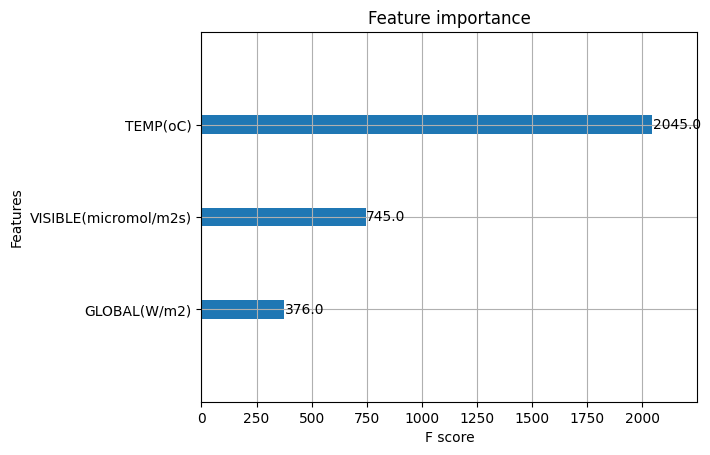

Cross-Validation RMSE: 44.96325299812732


In [39]:

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Select features and target variable
features = ['TEMP(oC)', 'GLOBAL(W/m2)', 'VISIBLE(micromol/m2s)']
target = 'TotaldailyenergyConsumption'
X = merged_data[features].fillna(merged_data[features].mean())
y = merged_data[target].fillna(merged_data[target].mean())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = xgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Feature Importance
plot_importance(xgb_model)
plt.show()

# Optional: Hyperparameter Tuning
# parameters = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 500, 1000]
# }
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=parameters, scoring='neg_mean_squared_error', cv=3)
# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)
# best_model = grid_search.best_estimator_
# y_pred_best = best_model.predict(X_test)
# rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
# print("Best RMSE:", rmse_best)

# Cross-Validation
scores = cross_val_score(xgb_model, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)
print("Cross-Validation RMSE:", rmse_scores.mean())
